In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import collections

In [3]:
src_path = '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/FileName.csv'
for i in range(1, 9):
    p = Path(src_path).parent.joinpath(f"sheet{str(i)}.csv")
    vars()['sheet' + str(i)] = pd.read_csv(p)

In [4]:
sheet1.head()

,provider-name__lnk,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,location-info__distance,star-rating href,review_number,provider_detail,feats,feats1,feats2
0,"Dr. Joseph Fata, MD","Cosmetic, Plastic & Reconstructive Surgery",4.5,51 ratings,with,10293 N Meridian St Ste 200,"Indianapolis, IN 46290",Offers Telehealth,Easy scheduling,Employs friendly staff,11.5,NaN,51,17,3,4,0
1,"Dr. Janet Turkle, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,303 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8,NaN,303,17,5,1,2
2,"Dr. Emily Hrisomalos, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,69 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8,NaN,69,17,5,1,2
3,"Dr. Christopher Jones, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,39 ratings,with,320 N Meridian St,"Indianapolis, IN 46204",Easy scheduling,Employs friendly staff,Explains conditions well,0.2,NaN,39,17,5,1,2
4,"Dr. Rachel Scott, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,25 ratings,with,100 Hospital Ln,"Danville, IN 46122",Offers Telehealth,Easy scheduling,Employs friendly staff,18.3,NaN,25,17,3,4,0


In [5]:
for i in range(1, 9):
    print(vars()['sheet'+str(i)].dtypes)

provider-name__lnk                  object
provider-details__specialty         object
sr-only                            float64
star-rating__reviews                object
sr-only 2                           object
location-info__office-loc           object
location-info__office-loc 2         object
feats-of-strength__feat-title       object
feats-of-strength__feat-title 2     object
feats-of-strength__feat-title 3     object
location-info__distance            float64
star-rating href                    object
review_number                        int64
provider_detail                      int64
feats                                int64
feats1                               int64
feats2                               int64
dtype: object
_2YrD_ src                          object
provider-name__lnk                  object
provider-name__lnk href             object
provider-details__specialty         object
sr-only                            float64
star-rating__reviews                obje

In [6]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [7]:
for i in range(1, 9):
    print(mem_usage(vars()['sheet' + str(i)]))

0.11 MB
0.10 MB
0.05 MB
0.59 MB
0.04 MB
0.09 MB
0.23 MB
0.03 MB


In [8]:
sheet1.describe(include='all')

,provider-name__lnk,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,location-info__distance,star-rating href,review_number,provider_detail,feats,feats1,feats2
count,157,157,158.000000,157,124,157,157,120,106,104,157.000000,33,158.000000,158.000000,158.000000,158.000000,158.000000
unique,157,15,NaN,49,1,121,57,4,3,4,NaN,33,NaN,NaN,NaN,NaN,NaN
top,"Dr. Joseph Fata, MD","Cosmetic, Plastic & Reconstructive Surgery",NaN,Leave A Review,with,3333 Burnet Ave,"Indianapolis, IN 46202",Easy scheduling,Employs friendly staff,Explains conditions well,NaN,https://www.healthgrades.com/physician/dr-avin...,NaN,NaN,NaN,NaN,NaN
freq,1,128,NaN,33,124,7,22,86,82,69,NaN,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.208861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.259873,NaN,24.246835,15.329114,3.322785,1.075949,1.537975
std,NaN,NaN,2.293174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.166402,NaN,77.695034,4.313278,2.085036,1.223675,0.921340
min,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,NaN,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.900000,NaN,1.000000,17.000000,1.000000,0.000000,1.000000
50%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.300000,NaN,8.000000,17.000000,5.000000,1.000000,2.000000
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.400000,NaN,19.750000,17.000000,5.000000,1.000000,2.000000


In [9]:
sheet2.describe(include='all')

,_2YrD_ src,provider-name__lnk,provider-name__lnk href,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,location-info__distance,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,star-rating href,review_number,provider_detail,feats,feats1,feats2
count,34,111,111,111,111.000000,111,84,111,111,111.000000,75,68,64,27,111.000000,111.000000,111.000000,111.000000,111.000000
unique,27,111,111,8,NaN,37,1,80,43,NaN,4,5,4,27,NaN,NaN,NaN,NaN,NaN
top,https://photos.healthgrades.com/img/silhouette...,"Dr. Clinton Humphrey, MD",https://www.healthgrades.com/physician/dr-clin...,"Cosmetic, Plastic & Reconstructive Surgery",NaN,Leave A Review,with,3901 Rainbow Blvd,"Kansas City, KS 66160",NaN,Easy scheduling,Employs friendly staff,Explains conditions well,https://www.healthgrades.com/physician/dr-kali...,NaN,NaN,NaN,NaN,NaN
freq,7,1,1,99,NaN,27,84,8,20,NaN,61,58,48,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.927928,NaN,NaN,NaN,NaN,30.450450,NaN,NaN,NaN,NaN,13.279279,16.126126,3.036036,0.864865,1.558559
std,NaN,NaN,NaN,NaN,2.365324,NaN,NaN,NaN,NaN,16.805583,NaN,NaN,NaN,NaN,26.878911,2.844827,2.307805,1.065888,0.805489
min,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,7.600000,NaN,NaN,NaN,NaN,-1.000000,5.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,21.300000,NaN,NaN,NaN,NaN,1.000000,17.000000,0.000000,0.000000,1.000000
50%,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,27.300000,NaN,NaN,NaN,NaN,7.000000,17.000000,5.000000,1.000000,2.000000
75%,NaN,NaN,NaN,NaN,4.750000,NaN,NaN,NaN,NaN,31.350000,NaN,NaN,NaN,NaN,16.000000,17.000000,5.000000,1.000000,2.000000


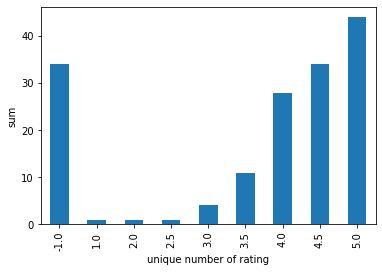

In [10]:
plot1 = sheet1['sr-only'].sort_values().value_counts(sort=False).plot(kind = 'bar', xlabel = 'unique number of rating', ylabel = 'sum').get_figure()

In [13]:
# save the figure on desired size
# plt.tight_layout()
# plot1.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/sr-fig1.png', bbox_inches='tight')

<Axes: >

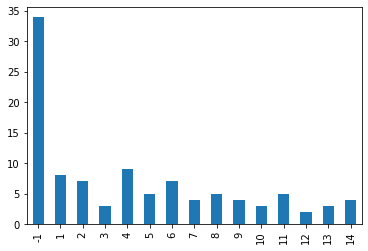

In [14]:
sheet1['review_number'].sort_values().value_counts(sort=False).head(15).plot(kind='bar')

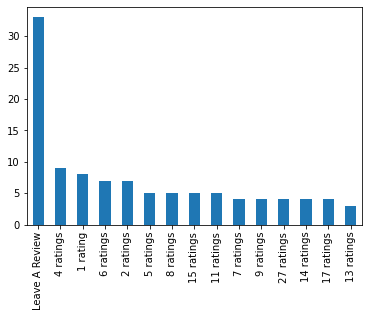

In [15]:
rn1 = sheet1['star-rating__reviews'].value_counts().head(15).plot(kind='bar').get_figure()

In [16]:
# rn1.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/review_number1.png', bbox_inches='tight')

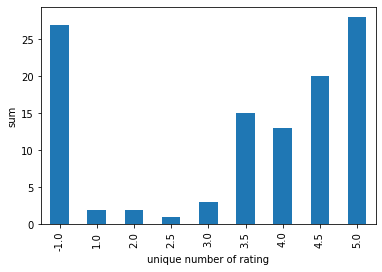

In [17]:
plot2 = sheet2['sr-only'].sort_values().value_counts(sort=False).plot(kind = 'bar', xlabel = 'unique number of rating', ylabel = 'sum').get_figure()

In [18]:
# plot2.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/sr-fig2.png', bbox_inches='tight')

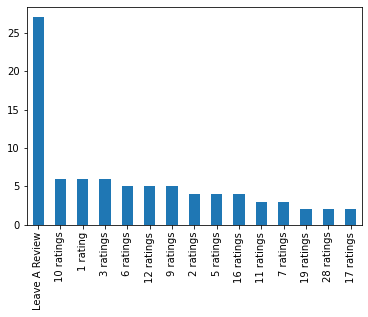

In [19]:
rn2 = sheet2['star-rating__reviews'].value_counts().head(15).plot(kind='bar').get_figure()

In [20]:
# rn2.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/review_number2.png', bbox_inches='tight')

In [21]:
# sheet 3 don't have sr-only and star-rating__reviews columns

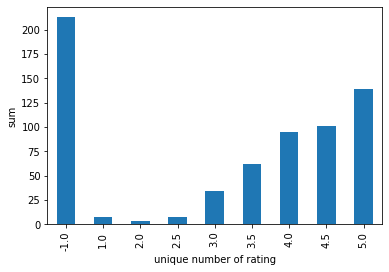

In [22]:
plot4 = sheet4['sr-only'].sort_values().value_counts(sort=False).plot(kind = 'bar', xlabel='unique number of rating', ylabel = 'sum').get_figure()

In [23]:
# plot4.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/sr-fig4.png', bbox_inches='tight')

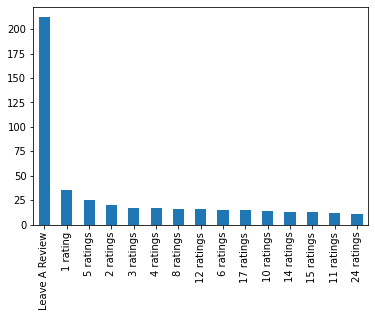

In [24]:
rn4 = sheet4['star-rating__reviews'].value_counts().head(15).plot(kind='bar').get_figure()

In [25]:
# rn4.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/review_number4.png', bbox_inches='tight')

In [26]:
# sheet5['sr-only'] = sheet5['sr-only'].sort_values

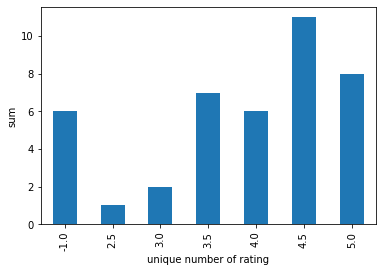

In [27]:
plot5 = sheet5['sr-only'].sort_values().value_counts(sort=False).plot(kind = 'bar', xlabel='unique number of rating', ylabel = 'sum').get_figure()

In [28]:
# plot5.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/sr-fig5.png', bbox_inches='tight')

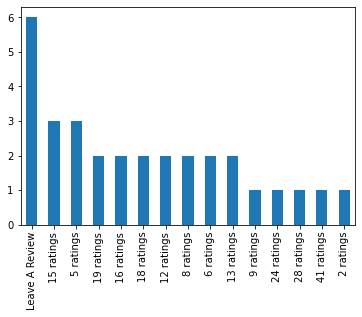

In [29]:
rn5 = sheet5['star-rating__reviews'].value_counts().head(15).plot(kind='bar').get_figure()

In [30]:
# rn5.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/review_number5.png', bbox_inches='tight')

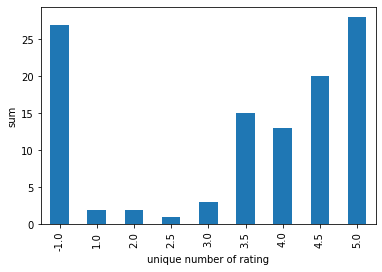

In [31]:
plot6 = sheet6['sr-only'].sort_values().value_counts(sort=False).plot(kind = 'bar', xlabel='unique number of rating', ylabel='sum').get_figure()

In [32]:
# plot6.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/sr-fig6.png', bbox_inches='tight')

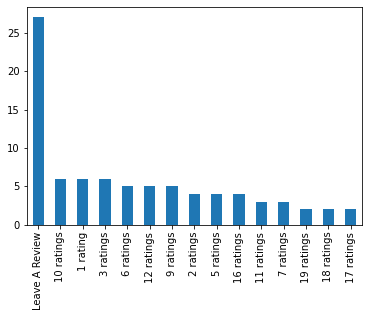

In [33]:
rn6 = sheet6['star-rating__reviews'].value_counts().head(15).plot(kind='bar').get_figure()

In [34]:
# rn6.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/review_number6.png', bbox_inches='tight')

In [35]:
# plot5.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/sr-fig6.png', bbox_inches='tight')

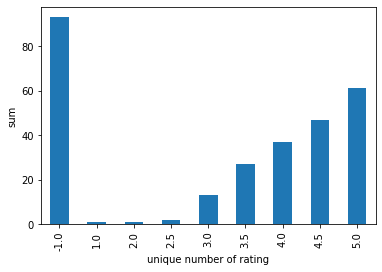

In [36]:
plot7 = sheet7['sr-only'].sort_values().value_counts(sort=False).plot(kind = 'bar', xlabel='unique number of rating', ylabel='sum').get_figure()

In [37]:
# plot7.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/sr-fig7.png', bbox_inches='tight')

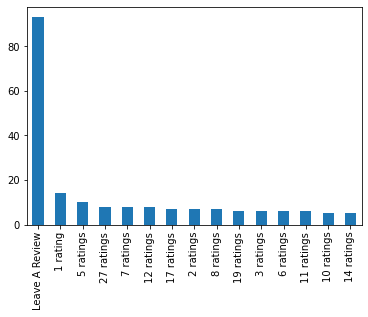

In [38]:
rn7 = sheet7['star-rating__reviews'].value_counts().head(15).plot(kind='bar').get_figure()

In [39]:
# rn7.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/review_number7.png', bbox_inches='tight')

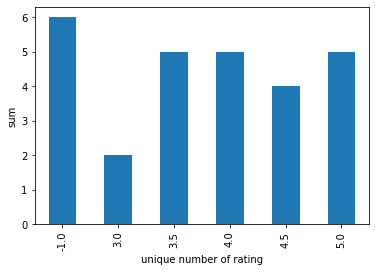

In [40]:
plot8 = sheet8['sr-only'].sort_values().value_counts(sort=False).plot(kind = 'bar', xlabel='unique number of rating', ylabel='sum').get_figure()

In [47]:
# plot8.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/sr-fig8.png', bbox_inches='tight')

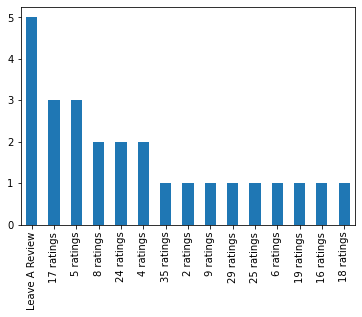

In [48]:
rn8 = sheet8['star-rating__reviews'].value_counts().head(15).plot(kind='bar').get_figure()

In [49]:
# rn8.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/review_number8.png', bbox_inches='tight')

In [50]:
prev1 = sheet1.groupby('provider-details__specialty').mean() # Dermatology may be the best result
prev1.sort_values('sr-only')

,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
provider-details__specialty,,,,,,,
Nursing (Nurse Practitioner),-1.000000,49.700000,-1.000000,29.0,0.000000,0.000000,1.00000
Head & Neck Surgical Oncology,2.000000,49.300000,1.000000,4.0,4.000000,0.500000,1.50000
"Ear, Nose, and Throat",2.333333,39.666667,10.333333,7.0,1.833333,0.833333,1.00000
General Surgery,2.875000,56.150000,3.750000,10.0,2.500000,0.500000,1.75000
"Cosmetic, Plastic & Reconstructive Surgery",3.195312,46.692969,20.171875,17.0,3.382812,1.015625,1.59375
Mohs Micrographic Surgery,3.500000,1.100000,6.000000,22.0,0.000000,0.000000,1.00000
Oral & Maxillofacial Surgery,3.500000,101.100000,20.000000,6.0,5.000000,0.000000,1.00000
Dermatopathology,4.000000,10.300000,28.000000,2.0,5.000000,1.000000,4.00000
Oculoplastic Surgery,4.250000,9.700000,38.000000,9.0,4.000000,2.500000,1.00000


In [51]:
col = prev1.columns
f = {}
for i in range(2):
    f[col[i]] = 'mean'
f[col[2]] = ['sum', 'mean']
for i in range(3, 7):
    f[col[i]] = 'median'

In [52]:
prev1 = sheet1.groupby('provider-details__specialty').agg(f) # Dermatology may be the best result
prev1.sort_values(('sr-only', 'mean'))

sr-only location-info__distance  \
                                                mean                    mean   
provider-details__specialty                                                    
Nursing (Nurse Practitioner)               -1.000000               49.700000   
Head & Neck Surgical Oncology               2.000000               49.300000   
Ear, Nose, and Throat                       2.333333               39.666667   
General Surgery                             2.875000               56.150000   
Cosmetic, Plastic & Reconstructive Surgery  3.195312               46.692969   
Mohs Micrographic Surgery                   3.500000                1.100000   
Oral & Maxillofacial Surgery                3.500000              101.100000   
Dermatopathology                            4.000000               10.300000   
Oculoplastic Surgery                        4.250000                9.700000   
Dermatology                                 4.500000               49.300000   
Orthopedic Hand Surgery                     4.500000               97.750000   
Pediatric Plastic Surgery                   4.500000                5.600000   
Ophthalmology                               4.625000               74.850000   
Cosmetic Medicine                           5.000000              101.000000   
Emergency Medicine                          5.000000               43.900000   

                                           review_number              \
                                                     sum        mean   
provider-details__specialty                                            
Nursing (Nurse Practitioner)                          -1   -1.000000   
Head & Neck Surgical Oncology                          2    1.000000   
Ear, Nose, and Throat                                 62   10.333333   
General Surgery                                       15    3.750000   
Cosmetic, Plastic & Reconstructive Surgery          2582   20.171875   
Mohs Micrographic Surgery                              6    6.000000   
Oral & Maxillofacial Surgery                          20   20.000000   
Dermatopathology                                      28   28.000000   
Oculoplastic Surgery                                  76   38.000000   
Dermatology                                          833  833.000000   
Orthopedic Hand Surgery                               38   19.000000   
Pediatric Plastic Surgery                             15    7.500000   
Ophthalmology                                        125   31.250000   
Cosmetic Medicine                                     29   29.000000   
Emergency Medicine                                     2    2.000000   

                                           provider_detail  feats feats1  \
                                                    median median median   
provider-details__specialty                                                
Nursing (Nurse Practitioner)                          29.0    0.0    0.0   
Head & Neck Surgical Oncology                          4.0    4.0    0.5   
Ear, Nose, and Throat                                  7.0    1.5    0.0   
General Surgery                                       10.0    2.5    0.5   
Cosmetic, Plastic & Reconstructive Surgery            17.0    5.0    1.0   
Mohs Micrographic Surgery                             22.0    0.0    0.0   
Oral & Maxillofacial Surgery                           6.0    5.0    0.0   
Dermatopathology                                       2.0    5.0    1.0   
Oculoplastic Surgery                                   9.0    4.0    2.5   
Dermatology                                           14.0    5.0    1.0   
Orthopedic Hand Surgery                                8.0    5.0    1.0   
Pediatric Plastic Surgery                              1.0    3.0    4.0   
Ophthalmology                                          5.0    3.0    4.0   
Cosmetic Medicine                                     11.0    5.0    1.0   
Emergency Medic

/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_8080/25274182.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prev1['sr-only'] / prev1['review_number'])


<Axes: ylabel='Density'>

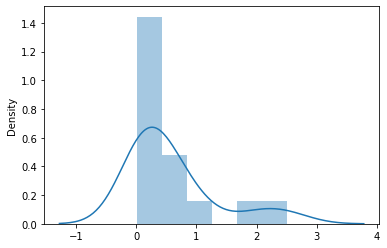

In [53]:
sns.distplot(prev1['sr-only'] / prev1['review_number'])

In [54]:
prev2 = sheet2.groupby('provider-details__specialty').mean() # Cosmetic Medicine may be the best result
prev2.sort_values('sr-only') # is there anyway to evaluate the quality of each specialty?

# how many doctors in each specialty

,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
provider-details__specialty,,,,,,,
"Cosmetic, Plastic & Reconstructive Surgery",2.813131,29.371717,13.484848,17.0,2.949495,0.868687,1.525253
"Ear, Nose, and Throat",3.250000,50.616667,11.833333,7.0,2.500000,0.666667,1.666667
Bariatric Surgery,3.500000,33.700000,6.000000,13.0,5.000000,1.000000,2.000000
General Hand Surgery,4.500000,31.100000,15.000000,20.0,5.000000,1.000000,2.000000
General Surgery,4.500000,29.300000,14.000000,10.0,5.000000,1.000000,2.000000
Oral & Maxillofacial Surgery,4.500000,18.600000,12.000000,6.0,5.000000,1.000000,2.000000
Cosmetic Medicine,5.000000,28.500000,11.000000,11.0,5.000000,1.000000,2.000000
Ophthalmology,5.000000,27.300000,10.000000,5.0,5.000000,1.000000,2.000000


In [55]:
prev4 = sheet4.groupby('provider-details__specialty').mean() # Breast Surgery may be the best result
prev4.sort_values('sr-only')

,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
provider-details__specialty,,,,,,,
Urology,-1.000000,79.050000,-1.000000,19.0,0.000000,0.000000,1.000000
Emergency Medicine,-1.000000,36.350000,-1.000000,16.0,0.000000,0.000000,1.000000
Pediatric Plastic Surgery,1.250000,79.600000,2.000000,1.0,3.000000,2.000000,1.500000
General Surgery,2.217391,59.669565,5.478261,10.0,2.652174,0.826087,1.391304
"Cosmetic, Plastic & Reconstructive Surgery",2.454064,66.995760,16.295053,17.0,2.687279,0.791519,1.441696
"Ear, Nose, and Throat",2.891892,66.716216,23.027027,7.0,2.837838,1.135135,1.378378
Urogynecology & Reconstructive Pelvic Surgery,3.500000,94.200000,25.000000,12.0,5.000000,1.000000,2.000000
Hair Transplant Surgery,3.500000,66.500000,49.000000,21.0,3.000000,4.000000,1.000000
Obstetrics & Gynecology,3.500000,82.500000,66.000000,27.0,0.000000,0.000000,1.000000


In [56]:
prev5 = sheet5.groupby('provider-details__specialty').mean() # Ophthalmology may be the best result
prev5.sort_values('sr-only')

,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
provider-details__specialty,,,,,,,
Family Medicine,2.000000,2.750000,67.500000,18.0,2.500000,0.500000,1.500000
"Ear, Nose, and Throat",2.500000,71.000000,9.000000,7.0,1.000000,0.000000,1.000000
"Cosmetic, Plastic & Reconstructive Surgery",3.486486,29.078378,15.648649,17.0,3.486486,1.189189,1.378378
Ophthalmology,5.000000,3.500000,4.000000,5.0,5.000000,1.000000,2.000000


In [57]:
prev6 = sheet6.groupby('provider-details__specialty').mean() # Cosmetic Medicine may be the best result
prev6.sort_values('sr-only')

,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
provider-details__specialty,,,,,,,
"Cosmetic, Plastic & Reconstructive Surgery",2.813131,15.118182,13.484848,17.0,2.949495,0.868687,1.525253
"Ear, Nose, and Throat",3.250000,46.083333,11.833333,7.0,2.500000,0.666667,1.666667
Bariatric Surgery,3.500000,15.100000,6.000000,13.0,5.000000,1.000000,2.000000
General Hand Surgery,4.500000,15.900000,15.000000,20.0,5.000000,1.000000,2.000000
General Surgery,4.500000,10.900000,14.000000,10.0,5.000000,1.000000,2.000000
Oral & Maxillofacial Surgery,4.500000,3.300000,12.000000,6.0,5.000000,1.000000,2.000000
Cosmetic Medicine,5.000000,12.700000,11.000000,11.0,5.000000,1.000000,2.000000
Ophthalmology,5.000000,9.000000,10.000000,5.0,5.000000,1.000000,2.000000


In [58]:
prev7 = sheet7.groupby('provider-details__specialty').mean() # Oral & Maxillofacial Surgery may be the best result
prev7.sort_values('sr-only')

,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
provider-details__specialty,,,,,,,
General Surgery,1.142857,10.771429,4.428571,10.0,1.428571,0.285714,1.285714
Pediatric Plastic Surgery,1.250000,9.300000,2.000000,1.0,3.000000,2.000000,1.500000
"Ear, Nose, and Throat",2.066667,13.680000,15.066667,7.0,1.600000,0.733333,1.133333
"Cosmetic, Plastic & Reconstructive Surgery",2.472803,9.026360,16.878661,17.0,2.694561,0.828452,1.443515
Obstetrics & Gynecology,3.500000,1.500000,66.000000,27.0,0.000000,0.000000,1.000000
Urogynecology & Reconstructive Pelvic Surgery,3.500000,10.700000,25.000000,12.0,5.000000,1.000000,2.000000
Dermatology,3.666667,1.033333,16.333333,14.0,3.666667,2.333333,0.666667
Orthopedic Hand Surgery,3.833333,4.700000,23.333333,8.0,2.666667,1.666667,1.000000
Dentistry,4.500000,16.166667,5.333333,3.0,5.000000,1.000000,2.333333


In [59]:
prev8 = sheet8.groupby('provider-details__specialty').mean() # General Surgery may be the best result
prev8.sort_values('sr-only')

,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
provider-details__specialty,,,,,,,
"Cosmetic, Plastic & Reconstructive Surgery",2.904762,16.176190,10.666667,17.0,3.380952,0.714286,1.619048
"Ear, Nose, and Throat",3.833333,36.266667,9.000000,7.0,5.000000,1.000000,1.666667
General Surgery,4.500000,3.850000,20.500000,10.0,5.000000,1.000000,2.000000


sheet1, line157
68.99%
35.14%
93.48%
sheet4, line661
37.46%
87.80%
64.86%
95.74%
sheet8, line2
92.59%


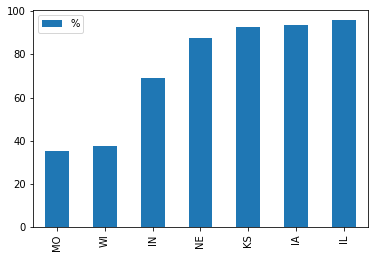

In [60]:
# check whether the state is really the state for the label state
state = {1:'IN', 2:'MO', 3:'IA', 4:'WI', 5:'NE', 6:'KS', 7:'IL', 8:'KS'}
percent = {}
for i in range(1, 9):
    cur_sheet = vars()['sheet'+str(i)]
    x = 0
    for j in range (len(cur_sheet['location-info__office-loc 2'])):
        try:
            if cur_sheet['location-info__office-loc 2'].iloc[j][-8:-6] != state[i]:
                x += 1
        except:
            print('sheet' + str(i) + ', ' + 'line' + str(j)) # are all empty rows
    length = len(cur_sheet['location-info__office-loc 2'])
    print("{:.2f}%".format(100 - x/length*100))
    percent[state[i]] = 100 - x/length*100
percent
temp = pd.DataFrame(data=percent.values(), index=percent.keys(), columns=['%'])
percentage = temp.sort_values('%').plot(kind='bar').get_figure()

In [61]:
# percentage.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project2-MDdataCleaning/data-explore/percentage.png', bbox_inches='tight')

## prepare to combine all sheets

In [62]:
sheet1.head(5)

,provider-name__lnk,provider-details__specialty,sr-only,star-rating__reviews,sr-only 2,location-info__office-loc,location-info__office-loc 2,feats-of-strength__feat-title,feats-of-strength__feat-title 2,feats-of-strength__feat-title 3,location-info__distance,star-rating href,review_number,provider_detail,feats,feats1,feats2
0,"Dr. Joseph Fata, MD","Cosmetic, Plastic & Reconstructive Surgery",4.5,51 ratings,with,10293 N Meridian St Ste 200,"Indianapolis, IN 46290",Offers Telehealth,Easy scheduling,Employs friendly staff,11.5,NaN,51,17,3,4,0
1,"Dr. Janet Turkle, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,303 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8,NaN,303,17,5,1,2
2,"Dr. Emily Hrisomalos, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,69 ratings,with,11455 N Meridian St Ste 150,"Carmel, IN 46032",Easy scheduling,Employs friendly staff,Explains conditions well,12.8,NaN,69,17,5,1,2
3,"Dr. Christopher Jones, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,39 ratings,with,320 N Meridian St,"Indianapolis, IN 46204",Easy scheduling,Employs friendly staff,Explains conditions well,0.2,NaN,39,17,5,1,2
4,"Dr. Rachel Scott, MD","Cosmetic, Plastic & Reconstructive Surgery",5.0,25 ratings,with,100 Hospital Ln,"Danville, IN 46122",Offers Telehealth,Easy scheduling,Employs friendly staff,18.3,NaN,25,17,3,4,0


In [63]:
for i in range(1, 9):
    if i == 3:
        continue
    cur_sheet = vars()['sheet'+str(i)]
    try:
        vars()['df'+str(i)] = cur_sheet[['sr-only', 'location-info__office-loc 2', 'location-info__distance', 'review_number', 'provider_detail', 'feats', 'feats1', 'feats2']]
        # for name duplication check
        vars()['df_'+str(i)] = cur_sheet[['provider-name__lnk', 'sr-only', 'location-info__office-loc', 'location-info__office-loc 2', 'location-info__distance', 'review_number', 'provider_detail', 'feats', 'feats1', 'feats2']]
    except:
        print(f'problem occur when processing sheet{i}')
        # sheet3 doesn't have sr-only and review number, let's just skip sheet 3 which is df3 for now

In [64]:
combine = pd.DataFrame(columns = ['sr-only', 'location-info__office-loc 2', 'location-info__distance', 'review_number', 'provider_detail', 'feats', 'feats1', 'feats2'])
combine_v2 = pd.DataFrame(columns = ['provider-name__lnk', 'sr-only', 'location-info__office-loc', 'location-info__office-loc 2', 'location-info__distance', 'review_number', 'provider_detail', 'feats', 'feats1', 'feats2'])
for i in range(1, 9):
    if i == 3:
        continue
    cur_df = vars()['df'+str(i)]
    cur_df_v2 = vars()['df_'+str(i)]
    combine = pd.concat([combine, cur_df], ignore_index=True)
    combine_v2 = pd.concat([combine_v2, cur_df_v2], ignore_index=True)

In [65]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sr-only                      1392 non-null   object
 1   location-info__office-loc 2  1389 non-null   object
 2   location-info__distance      1389 non-null   object
 3   review_number                1392 non-null   object
 4   provider_detail              1392 non-null   object
 5   feats                        1392 non-null   object
 6   feats1                       1392 non-null   object
 7   feats2                       1392 non-null   object
dtypes: object(8)
memory usage: 87.1+ KB


In [66]:
combine_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   provider-name__lnk           1389 non-null   object
 1   sr-only                      1392 non-null   object
 2   location-info__office-loc    1389 non-null   object
 3   location-info__office-loc 2  1389 non-null   object
 4   location-info__distance      1389 non-null   object
 5   review_number                1392 non-null   object
 6   provider_detail              1392 non-null   object
 7   feats                        1392 non-null   object
 8   feats1                       1392 non-null   object
 9   feats2                       1392 non-null   object
dtypes: object(10)
memory usage: 108.9+ KB


In [67]:
# find out the empty values row number
column = combine['location-info__office-loc 2']
for i in range(len(column)):
#     combine['location-info__office-loc 2'].iloc[i] = combine['location-info__office-loc 2'].iloc[i][-8:-6]
    if type(combine['location-info__office-loc 2'].iloc[i]) == float:
        print(i)

157
930
1367


In [68]:
# find out the empty values row number
column_v2 = combine_v2['location-info__office-loc 2']
for i in range(len(column_v2)):
#     combine['location-info__office-loc 2'].iloc[i] = combine['location-info__office-loc 2'].iloc[i][-8:-6]
    if type(combine_v2['location-info__office-loc 2'].iloc[i]) == float:
        print(i)

157
930
1367


In [69]:
combine.drop([157, 930, 1367], inplace=True)

In [70]:
combine_v2.drop([157, 930, 1367], inplace=True)

In [71]:
combine.reset_index(drop=True, inplace=True)

In [72]:
combine_v2.reset_index(drop=True, inplace=True)

In [73]:
# replace 'location-info__office-loc 2' to state name only
column = combine['location-info__office-loc 2']
for i in range(len(column)):
    combine['location-info__office-loc 2'].iloc[i] = combine['location-info__office-loc 2'].iloc[i][-8:-6]
combine

,sr-only,location-info__office-loc 2,location-info__distance,review_number,provider_detail,feats,feats1,feats2
0,4.5,IN,11.5,51,17,3,4,0
1,5.0,IN,12.8,303,17,5,1,2
2,5.0,IN,12.8,69,17,5,1,2
3,5.0,IN,0.2,39,17,5,1,2
4,5.0,IN,18.3,25,17,3,4,0
...,...,...,...,...,...,...,...,...
1384,-1.0,KS,1.4,-1,17,0,0,1
1385,-1.0,KS,2.1,-1,17,0,0,1
1386,-1.0,KS,4.5,-1,17,0,0,1
1387,-1.0,KS,6.4,-1,17,0,0,1


In [74]:
# replace 'location-info__office-loc 2' to state name only
column_v2 = combine_v2['location-info__office-loc 2']
for i in range(len(column_v2)):
    combine_v2['location-info__office-loc 2'].iloc[i] = combine_v2['location-info__office-loc 2'].iloc[i][-8:-6]
combine_v2

,provider-name__lnk,sr-only,location-info__office-loc,location-info__office-loc 2,location-info__distance,review_number,provider_detail,feats,feats1,feats2
0,"Dr. Joseph Fata, MD",4.5,10293 N Meridian St Ste 200,IN,11.5,51,17,3,4,0
1,"Dr. Janet Turkle, MD",5.0,11455 N Meridian St Ste 150,IN,12.8,303,17,5,1,2
2,"Dr. Emily Hrisomalos, MD",5.0,11455 N Meridian St Ste 150,IN,12.8,69,17,5,1,2
3,"Dr. Christopher Jones, MD",5.0,320 N Meridian St,IN,0.2,39,17,5,1,2
4,"Dr. Rachel Scott, MD",5.0,100 Hospital Ln,IN,18.3,25,17,3,4,0
...,...,...,...,...,...,...,...,...,...,...
1384,"Dr. Gerald Nelson, MD",-1.0,9403 Cross Creek St Retired,KS,1.4,-1,17,0,0,1
1385,"Dr. Nataliya Biskup, MD",-1.0,550 N Hillside St,KS,2.1,-1,17,0,0,1
1386,"Dr. John Rempel, MD",-1.0,6516 E 16TH ST N,KS,4.5,-1,17,0,0,1
1387,"Dr. Nicky Wheeler, MD",-1.0,1700 N Waterfront Pkwy Bldg 200,KS,6.4,-1,17,0,0,1


In [75]:
# sns.lineplot(data=combine, x='location-info__office-loc 2', y='feats')
# combine.info()

In [76]:
# check feats for each state
# combine.groupby(['location-info__office-loc 2', 'feats']).count()

In [77]:
# check for each column of feature, which is the most common one for each state
val = combine.groupby(['location-info__office-loc 2', 'feats']).count().reset_index()
val1 = combine.groupby(['location-info__office-loc 2', 'feats1']).count().reset_index()
val2 = combine.groupby(['location-info__office-loc 2', 'feats2']).count().reset_index()
lst = list(val['location-info__office-loc 2'].unique())
max_feats = []
max_feats1 = []
max_feats2 = []
for i in range(len(lst)):
    val_loc = val[val['location-info__office-loc 2'] == lst[i]]
    val_loc1 = val1[val1['location-info__office-loc 2'] == lst[i]]
    val_loc2 = val2[val2['location-info__office-loc 2'] == lst[i]]
    max_val = val_loc['sr-only'].max()
    max_val1 = val_loc1['sr-only'].max()
    max_val2 = val_loc2['sr-only'].max()
    max_feats.append(val_loc[val_loc['sr-only'] == max_val]['feats'].iloc[0])
    max_feats1.append(val_loc1[val_loc1['sr-only'] == max_val1]['feats1'].iloc[0])
    max_feats2.append(val_loc2[val_loc2['sr-only'] == max_val2]['feats2'].iloc[0])

# max_feats[0].iloc[0]
# len(lst)
# val

In [78]:
# # test case
# max_val = val[val['location-info__office-loc 2'] == 'IA']['sr-only'].max()
# # val['sr-only'] = val['sr-only'].astype(str).astype(int)
# val1 = val[val['location-info__office-loc 2'] == 'IA']
# val1[val1['sr-only'] == max_val]['feats']

In [91]:
feats = pd.DataFrame(data={'loc':lst, 'feats':max_feats, 'feats1':max_feats1, 'feats2':max_feats2})
feats

,loc,feats,feats1,feats2
0,IA,5,1,1
1,IL,5,1,1
2,IN,5,1,2
3,KS,5,1,2
4,KY,5,1,2
5,MI,5,0,1
6,MO,5,1,1
7,NE,5,1,2
8,OH,5,1,2
9,OK,5,0,1


In [92]:
dic_feats = {'NaN': 0, 'Employs friendly staff': 1, 'Explains conditions well': 2, 'Offers Telehealth': 3, 'Low wait times': 4, 'Easy scheduling': 5, 'Patients found trustworthy': 6}
dic_feats1 = {'NaN': 0, 'Employs friendly staff': 1, 'Explains conditions well': 2, 'Low wait times': 3, 'Easy scheduling': 4, 'Patients found trustworthy': 5}
dic_feats2 = {'Employs friendly staff': 0, 'NaN': 1, 'Explains conditions well': 2, 'Low wait times': 3, 'Patients found trustworthy': 4}

In [93]:
dic_feats = {y: x for x, y in dic_feats.items()}
dic_feats1 = {y: x for x, y in dic_feats1.items()}
dic_feats2 = {y: x for x, y in dic_feats2.items()}

In [94]:
dic_feats

{0: 'NaN',
 1: 'Employs friendly staff',
 2: 'Explains conditions well',
 3: 'Offers Telehealth',
 4: 'Low wait times',
 5: 'Easy scheduling',
 6: 'Patients found trustworthy'}

In [95]:
combine

,sr-only,location-info__office-loc 2,location-info__distance,review_number,provider_detail,feats,feats1,feats2
0,4.5,IN,11.5,51,17,3,4,0
1,5.0,IN,12.8,303,17,5,1,2
2,5.0,IN,12.8,69,17,5,1,2
3,5.0,IN,0.2,39,17,5,1,2
4,5.0,IN,18.3,25,17,3,4,0
...,...,...,...,...,...,...,...,...
1384,-1.0,KS,1.4,-1,17,0,0,1
1385,-1.0,KS,2.1,-1,17,0,0,1
1386,-1.0,KS,4.5,-1,17,0,0,1
1387,-1.0,KS,6.4,-1,17,0,0,1


In [96]:
sr_feats = {'feats':[], 'sr-only':[]}
for i in range(len(dic_feats)):
    sr_feats['feats'].append(dic_feats[i])
    sr = combine[combine['feats'] == i]['sr-only'].mean()
    sr_feats['sr-only'].append(sr)
sr_feats = pd.DataFrame(sr_feats).sort_values('sr-only', ascending=False)
print(sr_feats.to_latex(index=False))

\begin{tabular}{lr}
\toprule
                     feats &   sr-only \\
\midrule
           Easy scheduling &  4.443131 \\
Patients found trustworthy &  4.000000 \\
         Offers Telehealth &  3.758721 \\
  Explains conditions well &  3.611111 \\
    Employs friendly staff &  3.468085 \\
            Low wait times &  3.000000 \\
                       NaN & -0.220251 \\
\bottomrule
\end{tabular}



/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_8080/3931725266.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sr_feats.to_latex(index=False))


In [97]:
sr_feats1 = {'feats1':[], 'sr-only':[]}
for i in range(len(dic_feats1)):
    sr_feats1['feats1'].append(dic_feats1[i])
    sr1 = combine[combine['feats1'] == i]['sr-only'].mean()
    sr_feats1['sr-only'].append(sr1)
sr_feats1 = pd.DataFrame(sr_feats1).sort_values('sr-only', ascending=False)
print(sr_feats1.to_latex(index=False))

\begin{tabular}{lr}
\toprule
                    feats1 &  sr-only \\
\midrule
           Easy scheduling & 4.527132 \\
Patients found trustworthy & 4.500000 \\
    Employs friendly staff & 4.472435 \\
  Explains conditions well & 3.979167 \\
            Low wait times & 3.333333 \\
                       NaN & 0.233507 \\
\bottomrule
\end{tabular}



/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_8080/1385629578.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sr_feats1.to_latex(index=False))


In [98]:
sr_feats2 = {'feats2':[], 'sr-only':[]}
for i in range(len(dic_feats2)):
    sr_feats2['feats2'].append(dic_feats2[i])
    sr2 = combine[combine['feats2'] == i]['sr-only'].mean()
    sr_feats2['sr-only'].append(sr2)
sr_feats2 = pd.DataFrame(sr_feats2).sort_values('sr-only', ascending=False)
print(sr_feats2.to_latex(index=False))

\begin{tabular}{lr}
\toprule
                    feats2 &  sr-only \\
\midrule
            Low wait times & 4.784722 \\
    Employs friendly staff & 4.585366 \\
  Explains conditions well & 4.524904 \\
Patients found trustworthy & 4.042857 \\
                       NaN & 0.550235 \\
\bottomrule
\end{tabular}



/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_8080/3066605966.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sr_feats2.to_latex(index=False))


<Axes: >

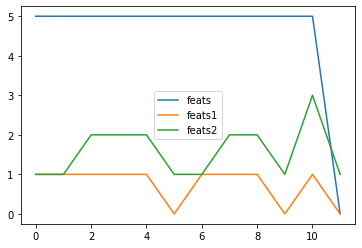

In [99]:
feats.plot()

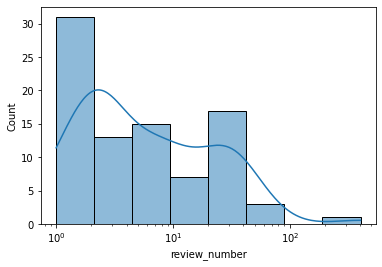

In [16]:
# distribution of revoew_number
# combine['review_number'].value_counts().plot()
combine_rn_log = sns.histplot(combine['review_number'].value_counts(), kde = True, log_scale=True).get_figure()

In [18]:
# raw = combine['star-rating__reviews'].value_counts().head(15).plot(kind='bar').get_figure()

In [9]:
# raw.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/raw.png', bbox_inches='tight')

In [21]:
# combine_rn_log.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/combine_rn_log.png', bbox_inches='tight')

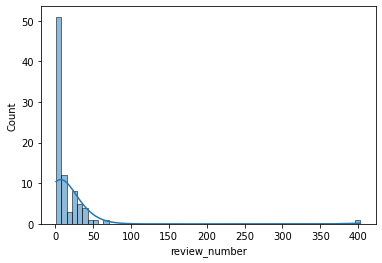

In [17]:
combine_rn = sns.histplot(combine['review_number'].value_counts(), kde = True).get_figure()

In [25]:
combine_rn.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/combine_rn.png', bbox_inches='tight')

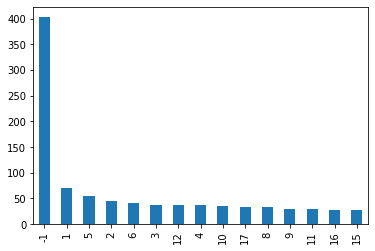

In [27]:
combine_rn_raw = combine['review_number'].value_counts().head(15).plot(kind='bar').get_figure()

In [28]:
# combine_rn_raw.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/combine_rn_raw.png', bbox_inches='tight')

<Axes: ylabel='Count'>

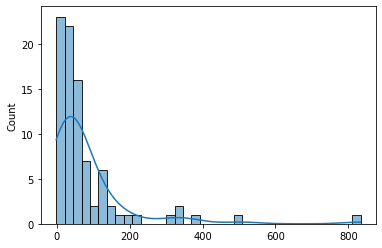

In [12]:
sns.histplot(combine['review_number'].unique(), kde = True)

## check the duplication of names, using combine_v2

In [60]:
combine_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   provider-name__lnk           1389 non-null   object
 1   sr-only                      1389 non-null   object
 2   location-info__office-loc    1389 non-null   object
 3   location-info__office-loc 2  1389 non-null   object
 4   location-info__distance      1389 non-null   object
 5   review_number                1389 non-null   object
 6   provider_detail              1389 non-null   object
 7   feats                        1389 non-null   object
 8   feats1                       1389 non-null   object
 9   feats2                       1389 non-null   object
dtypes: object(10)
memory usage: 108.6+ KB


In [18]:
# check whether there's duplicates of names
# note: include the column of provider-name__lnk when creating combine
len(combine_v2['provider-name__lnk']) # 1387 after delete 3 form ori which was 1389

1389

In [19]:
lst = list(combine_v2['provider-name__lnk'])
lst_1 = [item for item, count in collections.Counter(lst).items() if count > 1]
len(lst_1) # 546
# there's 543 unique names after deletion

546

In [63]:
type(lst_1[0])

str

In [64]:
combine_v2.head(5)

,provider-name__lnk,sr-only,location-info__office-loc,location-info__office-loc 2,location-info__distance,review_number,provider_detail,feats,feats1,feats2
0,"Dr. Joseph Fata, MD",4.5,10293 N Meridian St Ste 200,IN,11.5,51,17,3,4,0
1,"Dr. Janet Turkle, MD",5.0,11455 N Meridian St Ste 150,IN,12.8,303,17,5,1,2
2,"Dr. Emily Hrisomalos, MD",5.0,11455 N Meridian St Ste 150,IN,12.8,69,17,5,1,2
3,"Dr. Christopher Jones, MD",5.0,320 N Meridian St,IN,0.2,39,17,5,1,2
4,"Dr. Rachel Scott, MD",5.0,100 Hospital Ln,IN,18.3,25,17,3,4,0


In [20]:
check_name = combine_v2[combine_v2['provider-name__lnk'].isin(lst_1)]
# check_name = combine[combine['provider-name__lnk'].isin(lst_1)].drop(columns='location-info__office-loc 2')
check_res = check_name.groupby(['provider-name__lnk', 'location-info__office-loc 2'], as_index=False).mean()
# check_res.to_csv('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/check_name.csv')
check_res
# check_loc2 = check_name.groupby(['provider-name__lnk', 'sr-only']).mean()
# check_loc2
# next version of mean need to remove all invalid column or a TypeError will be raised

/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_3813/3084768821.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  check_res = check_name.groupby(['provider-name__lnk', 'location-info__office-loc 2'], as_index=False).mean()


,provider-name__lnk,location-info__office-loc 2,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
0,"Abbey Bays, MPAS",KS,-1.0,22.70,-1.0,17.0,0.0,0.0,1.0
1,"Brenna Hennessey, PA-C",IL,-1.0,42.00,-1.0,17.0,0.0,0.0,1.0
2,"Bryn Byers, NP",IL,5.0,65.90,13.0,26.0,3.0,4.0,0.0
3,"Crystal Wesockes, PA-C",IL,5.0,42.10,1.0,17.0,5.0,1.0,2.0
4,"Dr. A Chauhan, DO",IL,4.5,81.75,65.0,7.0,5.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
544,"Layla Shadman, MSPA",IL,-1.0,48.05,-1.0,17.0,0.0,0.0,1.0
545,"Megan Perinovic, PA-C",WI,-1.0,38.30,-1.0,17.0,0.0,0.0,1.0
546,"Rachel Hunt, PA-C",KS,-1.0,21.00,-1.0,17.0,0.0,0.0,1.0
547,"Rachita Sood, MPH",IL,-1.0,42.00,-1.0,17.0,0.0,0.0,1.0


In [21]:
lst = check_res['provider-name__lnk']
dif_dup = [item for item, count in collections.Counter(lst).items() if count > 1]
dif_dup
# result is ['Dr. Adam Cohen, MD', 'Dr. Matthew Marr, MD', 'Dr. Rao Chundury, MD'] which are 3 duplicate names in different states

['Dr. Adam Cohen, MD', 'Dr. Matthew Marr, MD', 'Dr. Rao Chundury, MD']

In [22]:
# # test case
# # len(check_res['provider-name__lnk'].unique())
# idx = check_res[check_res['provider-name__lnk'] == 'Abbey Bays, MPAS'].index 
# check_res.iloc[idx]

In [23]:
# test case
combine_v2[combine_v2['provider-name__lnk'] == 'Abbey Bays, MPAS']

,provider-name__lnk,sr-only,location-info__office-loc,location-info__office-loc 2,location-info__distance,review_number,provider_detail,feats,feats1,feats2
260,"Abbey Bays, MPAS",-1.0,12330 Metcalf Ave Ste 500,KS,30.8,-1,17,0,0,1
1074,"Abbey Bays, MPAS",-1.0,12330 Metcalf Ave Ste 500,KS,14.6,-1,17,0,0,1


In [24]:
# for i in range(len(check_res)):
#     name = check_res.iloc[i]['provider-name__lnk']
#     combine[combine['provider-name__lnk'] == name]

## replace the three names one by one

In [25]:
first = (combine_v2[combine_v2['provider-name__lnk'] == 'Dr. Adam Cohen, MD'])
first

,provider-name__lnk,sr-only,location-info__office-loc,location-info__office-loc 2,location-info__distance,review_number,provider_detail,feats,feats1,feats2
38,"Dr. Adam Cohen, MD",5.0,545 Barnhill Dr,IN,1.2,4,17,5,1,2
390,"Dr. Adam Cohen, MD",-1.0,1725 W Harrison St Ste 906,IL,83.6,-1,17,0,0,1
1137,"Dr. Adam Cohen, MD",-1.0,1725 W Harrison St Ste 906,IL,2.4,-1,17,0,0,1


In [26]:
# replace the three names one by one
first.groupby(['provider-name__lnk', 'location-info__office-loc']).mean() # 43.0 location-info__distance

/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_3813/1855261036.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  first.groupby(['provider-name__lnk', 'location-info__office-loc']).mean() # 43.0 location-info__distance


sr-only  \
provider-name__lnk location-info__office-loc             
Dr. Adam Cohen, MD 1725 W Harrison St Ste 906     -1.0   
                   545 Barnhill Dr                 5.0   

                                               location-info__distance  \
provider-name__lnk location-info__office-loc                             
Dr. Adam Cohen, MD 1725 W Harrison St Ste 906                     43.0   
                   545 Barnhill Dr                                 1.2   

                                               review_number  provider_detail  \
provider-name__lnk location-info__office-loc                                    
Dr. Adam Cohen, MD 1725 W Harrison St Ste 906           -1.0             17.0   
                   545 Barnhill Dr                       4.0             17.0   

                                               feats  feats1  feats2  
provider-name__lnk location-info__office-loc                          
Dr. Adam Cohen, MD 1725 W Harrison St Ste 906    0.0     0.0     1.0  
                   545 Barnhill Dr               5.0     1.0     2.0

In [27]:
combine_v2.iloc[390]['location-info__distance'] = 43.0

In [28]:
combine_v2.iloc[390]['provider-name__lnk'] = 'Dr. Adam Cohen, MD1'

In [29]:
combine_v2.drop(1137, inplace=True)

In [30]:
combine_v2.reset_index(drop=True, inplace=True)

## end the first one, start the second one

In [31]:
second = combine_v2[combine_v2['provider-name__lnk'] == 'Dr. Matthew Marr, MD']
second

,provider-name__lnk,sr-only,location-info__office-loc,location-info__office-loc 2,location-info__distance,review_number,provider_detail,feats,feats1,feats2
244,"Dr. Matthew Marr, MD",-1.0,2301 Holmes St,MO,18.7,-1,17,0,0,1
1057,"Dr. Matthew Marr, MD",-1.0,2301 Holmes St,MO,3.4,-1,17,0,0,1
1387,"Dr. Matthew Marr, MD",-1.0,514 Cleveland St,KS,91.7,-1,17,0,0,1


In [32]:
second.groupby(['provider-name__lnk', 'location-info__office-loc']).mean()

/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_3813/2759587600.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  second.groupby(['provider-name__lnk', 'location-info__office-loc']).mean()


sr-only  \
provider-name__lnk   location-info__office-loc            
Dr. Matthew Marr, MD 2301 Holmes St                -1.0   
                     514 Cleveland St              -1.0   

                                                location-info__distance  \
provider-name__lnk   location-info__office-loc                            
Dr. Matthew Marr, MD 2301 Holmes St                               11.05   
                     514 Cleveland St                             91.70   

                                                review_number  \
provider-name__lnk   location-info__office-loc                  
Dr. Matthew Marr, MD 2301 Holmes St                      -1.0   
                     514 Cleveland St                    -1.0   

                                                provider_detail  feats  \
provider-name__lnk   location-info__office-loc                           
Dr. Matthew Marr, MD 2301 Holmes St                        17.0    0.0   
                     514 Cleveland St                      17.0    0.0   

                                                feats1  feats2  
provider-name__lnk   location-info__office-loc                  
Dr. Matthew Marr, MD 2301 Holmes St                0.0     1.0  
                     514 Cleveland St              0.0     1.0

In [33]:
combine_v2.iloc[244]['location-info__distance'] = 11.05
combine_v2.drop(1057, inplace=True)
combine_v2.reset_index(drop=True, inplace=True)

In [34]:
combine_v2.iloc[1386]['provider-name__lnk'] = 'Dr. Matthew Marr, MD1'

## second done, start third

In [35]:
third = combine_v2[combine_v2['provider-name__lnk'] == 'Dr. Rao Chundury, MD']
third

,provider-name__lnk,sr-only,location-info__office-loc,location-info__office-loc 2,location-info__distance,review_number,provider_detail,feats,feats1,feats2
39,"Dr. Rao Chundury, MD",5.0,1160 W Michigan St,IN,1.3,4,5,5,1,2
943,"Dr. Rao Chundury, MD",5.0,3902 LEAVENWORTH ST,NE,3.5,4,5,5,1,2


In [36]:
combine_v2.iloc[943]['provider-name__lnk'] = 'Dr. Rao Chundury, MD1'

## third done above, start combining all other duplicate names in the same state

In [37]:
# combine[combine['provider-name__lnk'] == 'Dr. Rao Chundury, MD']

In [38]:
# result = pd.DataFrame(check_res)
# len(check_loc2.index.get_level_values('provider-name__lnk').to_list())
# lst = check_loc2.index.get_level_values('provider-name__lnk').to_list()
# [item for item, count in collections.Counter(lst).items() if count > 1]
# combine[combine['provider-name__lnk'] == 'Dr. Adam Cohen, MD']

In [39]:
# check the unique value now
lst = combine_v2['provider-name__lnk']
dup_second = [item for item, count in collections.Counter(lst).items() if count > 1]
len(dup_second) # 543
'Dr. Adam Cohen, MD' in dup_second # false

False

In [40]:
len(combine_v2['provider-name__lnk'].unique()) # 821
len(combine_v2) # 1387
1387 - 821

566

In [41]:
combine_v2 = combine_v2.groupby(['provider-name__lnk', 'location-info__office-loc 2'], as_index=False).mean()
# 'Dr. Adam Cohen, MD' in combine_v2['provider-name__lnk'] # false

/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_3813/1799108738.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  combine_v2 = combine_v2.groupby(['provider-name__lnk', 'location-info__office-loc 2'], as_index=False).mean()


In [55]:
# combine_v2.to_csv('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/combine_v2.csv')

In [45]:
# lst = check_res['provider-name__lnk']
# lst1 = [item for item, count in collections.Counter(lst).items() if count > 1]
# len(lst1) # 63
# # lst1
# # set_lst = set(lst1)
# # len(set_lst)
# # len(check_res['location-info__office-loc'].unique())

In [42]:
# result = result.set_index(['provider-name__lnk', 'location-info__office-loc'])
# check_res.to_csv('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/check_name.csv')
combine_v2[combine_v2['provider-name__lnk'] == 'Dr. Victor Cimino, MD']

,provider-name__lnk,location-info__office-loc 2,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
782,"Dr. Victor Cimino, MD",IL,4.0,42.0,22.0,17.0,5.0,1.0,2.0


In [43]:
# result.to_excel('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/check_name.xlsx') # to_excel will merge the duplicates rows but csv won't

In [44]:
# lst = list(check_res['provider-name__lnk'])
# [item for item, count in collections.Counter(lst).items() if count > 1]

In [45]:
count = 0
for i in range(len(lst_1)):
    unq = len(check_name[check_name['provider-name__lnk'] == lst_1[i]]['location-info__office-loc'].unique())
    if unq != len(check_name[check_name['provider-name__lnk'] == lst_1[i]]): # duplication of loc
        count += 1
print(count)

494


In [46]:
check_name

,provider-name__lnk,sr-only,location-info__office-loc,location-info__office-loc 2,location-info__distance,review_number,provider_detail,feats,feats1,feats2
38,"Dr. Adam Cohen, MD",5.0,545 Barnhill Dr,IN,1.2,4,17,5,1,2
39,"Dr. Rao Chundury, MD",5.0,1160 W Michigan St,IN,1.3,4,5,5,1,2
157,"Dr. Clinton Humphrey, MD",5.0,4320 Wornall Rd Ste 512,MO,20.9,3,17,3,4,0
158,"Dr. Christian Stallworth, MD",5.0,3908 S Noland Rd,MO,14.8,37,17,3,4,0
159,"Dr. Victor Perez Sr, MD",5.0,11532 W 119th St,KS,32.3,17,17,3,4,0
...,...,...,...,...,...,...,...,...,...,...
1359,"Dr. Arvydas Tauras, MD",-1.0,1100 W Central Rd Ste 206,IL,23.2,-1,17,0,0,1
1361,"Dr. Richard Sperling, MD",-1.0,2095 PAINTERS LAKE RD,IL,24.3,-1,17,0,0,1
1368,"Dr. Bethany King, MD",5.0,3460 N Ridge Rd Ste 160,KS,6.4,9,17,5,1,2
1380,"Dr. Shao Jiang, MD",3.5,3243 E Murdock St Ste 201,KS,2.2,5,17,5,1,1


## question here: there are name duplicates but some are not within one state, others are. I don't do anything, just take them as different people, but should I do something to clean this up?
## -- ans: up to me, I can make an assumption

In [36]:
check_name = combine[combine['provider-name__lnk'].isin(lst_1)]
# check_name.to_csv('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/check_name.csv')
# check_name.groupby(['provider-name__lnk', 'location-info__office-loc 2']).count()
# check_name.duplicated().sum() # result is 0
check_name[check_name['provider-name__lnk'] == 'Dr. Rao Chundury, MD']
check_name[check_name['provider-name__lnk'] == lst_1[0]]

,provider-name__lnk,sr-only,location-info__office-loc 2,location-info__distance,review_number,provider_detail,feats,feats1,feats2
38,"Dr. Adam Cohen, MD",5.0,IN,1.2,4,17,5,1,2
390,"Dr. Adam Cohen, MD",-1.0,IL,83.6,-1,17,0,0,1
1137,"Dr. Adam Cohen, MD",-1.0,IL,2.4,-1,17,0,0,1


In [90]:
# # check whether there is duplication of name
# name = []
# for i in range(1, 9):
#     cur_sheet = vars()['sheet'+str(i)]
#     for j in range(len(cur_sheet['provider-name__lnk'])):
#         name.append(cur_sheet['provider-name__lnk'].iloc[j])
# len(name)

1438

In [98]:
# # find duplicates of names
# lst = [item for item, count in collections.Counter(name).items() if count > 1]
# len(lst)

552

In [11]:
# pre_combine = combine.to_csv('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/pre_combine.csv')

## evaluate the combined sheets

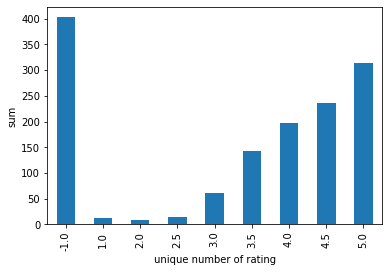

In [13]:
plot = combine['sr-only'].sort_values().value_counts(sort=False).plot(kind='bar', xlabel='unique number of rating', ylabel='sum').get_figure()

In [14]:
plot.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/sr-fig.png', bbox_inches='tight')

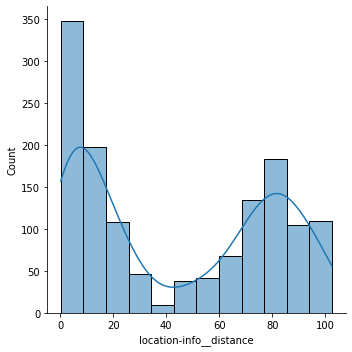

In [15]:
distance = sns.displot(data=combine['location-info__distance'], kde=True)
# plot.set_yscale('log')

In [16]:
distance.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/distance.png', bbox_inches='tight')

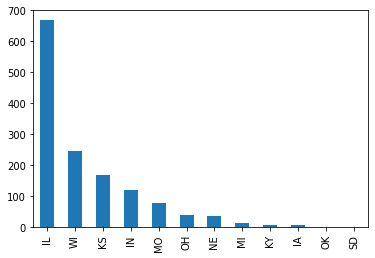

In [45]:
state = combine['location-info__office-loc 2'].value_counts().plot(kind='bar').get_figure()

In [46]:
state.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/state-fig.png', bbox_inches='tight')

In [18]:
df_combine = combine.groupby(['location-info__office-loc 2', 'provider_detail']).count()
# df_combine.reset_index('location-info__office-loc 2', inplace=True)
df_combine

sr-only  location-info__distance  \
location-info__office-loc 2 provider_detail                                     
IA                          7                      1                        1   
                            17                     6                        6   
IL                          1                      4                        4   
                            3                      5                        5   
                            5                      4                        4   
...                                              ...                      ...   
WI                          8                      2                        2   
                            10                    10                       10   
                            14                     1                        1   
                            16                     2                        2   
                            17                   220                      220   

                                             review_number  feats  feats1  \
location-info__office-loc 2 provider_detail                                 
IA                          7                            1      1       1   
                            17                           6      6       6   
IL                          1                            4      4       4   
                            3                            5      5       5   
                            5                            4      4       4   
...                                                    ...    ...     ...   
WI                          8                            2      2       2   
                            10                          10     10      10   
                            14                           1      1       1   
                            16                           2      2       2   
                            17                         220    220     220   

                                             feats2  
location-info__office-loc 2 provider_detail          
IA                          7                     1  
                            17                    6  
IL                          1                     4  
                            3                     5  
                            5                     4  
...                                             ...  
WI                          8                     2  
                            10                   10  
                            14                    1  
                            16                    2  
                            17                  220  

[72 rows x 6 columns]

In [29]:
# df_combine.index.get_level_values('provider_detail')
gb = df_combine.to_csv('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/gb.csv')

In [14]:
gb = pd.read_csv('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/gb.csv')
gb

,location-info__office-loc 2,provider_detail,sr-only,location-info__distance,review_number,feats,feats1,feats2
0,IA,7,1,1,1,1,1,1
1,IA,17,6,6,6,6,6,6
2,IL,1,4,4,4,4,4,4
3,IL,3,5,5,5,5,5,5
4,IL,5,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...
67,WI,8,2,2,2,2,2,2
68,WI,10,10,10,10,10,10,10
69,WI,14,1,1,1,1,1,1
70,WI,16,2,2,2,2,2,2


In [15]:
gb['location-info__office-loc 2'].unique()

array(['IA', 'IL', 'IN', 'KS', 'KY', 'MI', 'MO', 'NE', 'OH', 'OK', 'SD',
       'WI'], dtype=object)

In [16]:
gb[gb['location-info__office-loc 2'] == 'MI']

,location-info__office-loc 2,provider_detail,sr-only,location-info__distance,review_number,feats,feats1,feats2
45,MI,6,1,1,1,1,1,1
46,MI,7,3,3,3,3,3,3
47,MI,17,9,9,9,9,9,9


In [17]:
# # test case
# states = gb['location-info__office-loc 2'].unique()
# detail_state = {}
# value = gb[gb['location-info__office-loc 2'] == 'IA']
# maxi = max(value['sr-only'])
# idx = value[value['sr-only'] == maxi].index
# int(value['provider_detail'].loc[idx])
# # print(value)

states = gb['location-info__office-loc 2'].unique()
detail_state = {}
for i in range(len(states)):
    value = gb[gb['location-info__office-loc 2'] == states[i]]
    maxi = max(value['sr-only'])
    idx = value[value['sr-only'] == maxi].index
    try:
        detail_state[states[i]] = int(value['provider_detail'].loc[idx])
    except TypeError:
        detail_state[states[i]] = list(value['provider_detail'].loc[idx])
detail_state

{'IA': 17,
 'IL': 17,
 'IN': 17,
 'KS': 17,
 'KY': 17,
 'MI': 17,
 'MO': 17,
 'NE': 17,
 'OH': 17,
 'OK': [7, 17],
 'SD': 17,
 'WI': 17}

\begin{tabular}{lr}
\toprule
                              provider\_detail &  sr-only \\
\midrule
                              General Surgery &      5.0 \\
                    Mohs Micrographic Surgery &      5.0 \\
Urogynecology \& Reconstructive Pelvic Surgery &      5.0 \\
                         Oculoplastic Surgery &      5.0 \\
                                Ophthalmology &      5.0 \\
                     Physician Assistant (PA) &      5.0 \\
                              Family Medicine &      5.0 \\
                 Oral \& Maxillofacial Surgery &      5.0 \\
                            Bariatric Surgery &      5.0 \\
                                   Phlebology &      5.0 \\
                            Cosmetic Medicine &      5.0 \\
                           Emergency Medicine &      5.0 \\
                         Dermatologic Surgery &      5.0 \\
                             Dermatopathology &      5.0 \\
\bottomrule
\end{tabular}



/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_1751/735110429.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_sr5['provider_detail'].iloc[i] = map_pd1[pd_sr5['provider_detail'].iloc[i]]
/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_1751/735110429.py:46: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd_sr5.to_latex(index=False))


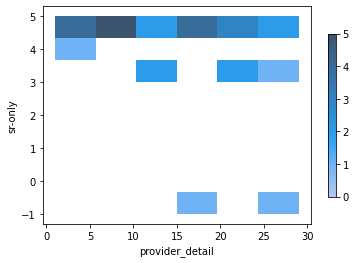

In [80]:
# what's the most sr-only for each specialty
pd_sr = {'provider_detail':[], 'sr-only':[]}
for i in range(30):
    pd_sr['sr-only'].append(combine[combine['provider_detail'] == i]['sr-only'].max()) # change the max to mean if want see the avg
    pd_sr['provider_detail'].append(i)
pd_sr = pd.DataFrame(pd_sr)
sns.histplot(data=pd_sr, x = 'provider_detail', y = 'sr-only', cbar=True, cbar_kws=dict(shrink=.75))
# pd_sr['sr-only'].plot()
pd_sr5 = pd_sr[pd_sr['sr-only'] == 5.0]
map_pd = {'nan': 0,
 'General Surgery': 1,
 'Nursing (Nurse Practitioner)': 2,
 'Mohs Micrographic Surgery': 3,
 'Urogynecology & Reconstructive Pelvic Surgery': 4,
 'Oculoplastic Surgery': 5,
 'Ophthalmology': 6,
 'Physician Assistant (PA)': 7,
 'Dermatology (Nurse Practitioner)': 8,
 'Orthopedic Hand Surgery': 9,
 'Family Medicine': 10,
 'Oral & Maxillofacial Surgery': 11,
 'Ear, Nose, and Throat': 12,
 'Dermatology': 13,
 'Urology': 14,
 'Bariatric Surgery': 15,
 'Phlebology': 16,
 'Cosmetic Medicine': 17,
 'Emergency Medicine': 18,
 'Hair Transplant Surgery': 19,
 'General Hand Surgery': 20,
 'Dentistry': 21,
 'Speech-Language Pathology': 22,
 'Breast Surgery': 23,
 'Cosmetic, Plastic & Reconstructive Surgery': 24,
 'Pediatric Plastic Surgery': 25,
 'Dermatologic Surgery': 26,
 'Obstetrics & Gynecology': 27,
 'Dermatopathology': 28,
 'Head & Neck Surgical Oncology': 29}
map_pd1 = {y: x for x, y in map_pd.items()} # switch the map's key and value
# map_pd1
for i in range(len(pd_sr5['provider_detail'])):
#     print(pd_sr5['provider_detail'].iloc[i])
    pd_sr5['provider_detail'].iloc[i] = map_pd1[pd_sr5['provider_detail'].iloc[i]]
pd_sr5 # print(pd_sr5.to_latex(index=False))
print(pd_sr5.to_latex(index=False))

In [104]:
pd_rn = {'provider_detail':[], 'review_number':[]}
for i in range(30):
    pd_rn['review_number'].append(combine[combine['provider_detail'] == i]['review_number'].sum()) # change the max to mean if want see the avg
    pd_rn['provider_detail'].append(i)
pd_rn = pd.DataFrame(pd_rn)
# rn_fig = pd_rn.plot(y = 'review_number').get_figure()
# pd_rn.info()
pd_rn_top5 = pd_rn.sort_values('review_number').tail().copy()
for i in range(len(pd_rn_top5['provider_detail'])):
#     print(pd_sr5['provider_detail'].iloc[i])
    pd_rn_top5['provider_detail'].iloc[i] = map_pd1[pd_rn_top5['provider_detail'].iloc[i]]
pd_rn_top5.sort_values('review_number', ascending=False, inplace=True)
print(pd_rn_top5.to_latex(index=False))

\begin{tabular}{lr}
\toprule
                 provider\_detail &  review\_number \\
\midrule
               Cosmetic Medicine &          19312 \\
        Physician Assistant (PA) &           1318 \\
                         Urology &            934 \\
                 Family Medicine &            241 \\
Dermatology (Nurse Practitioner) &            194 \\
\bottomrule
\end{tabular}



/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_1751/2162438735.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd_rn_top5.to_latex(index=False))


In [18]:
# map 'location-info__office-loc 2' to categorical numbers
loc = combine['location-info__office-loc 2'].unique()
loc_dic = {}
for i in range(len(loc)):
    loc_dic[loc[i]] = i
loc_dic

{'IN': 0,
 'OH': 1,
 'KY': 2,
 'IL': 3,
 'MO': 4,
 'KS': 5,
 'MI': 6,
 'WI': 7,
 'IA': 8,
 'NE': 9,
 'SD': 10,
 'OK': 11}

In [48]:
# for combine_v2
# map 'location-info__office-loc 2' to categorical numbers
loc_v2 = combine_v2['location-info__office-loc 2'].unique()
loc_dic_v2 = {}
for i in range(len(loc_v2)):
    loc_dic_v2[loc_v2[i]] = i
loc_dic_v2

{'KS': 0,
 'IN': 1,
 'IL': 2,
 'WI': 3,
 'IA': 4,
 'MO': 5,
 'KY': 6,
 'NE': 7,
 'OH': 8,
 'MI': 9,
 'OK': 10,
 'SD': 11}

In [14]:
column = combine['location-info__office-loc 2']
for i in range(len(column)):
    value = combine['location-info__office-loc 2'].iloc[i]
    combine['location-info__office-loc 2'].iloc[i] = loc_dic[value]
combine

,sr-only,location-info__office-loc 2,location-info__distance,review_number,provider_detail,feats,feats1,feats2
0,4.5,0,11.5,51,17,3,4,0
1,5.0,0,12.8,303,17,5,1,2
2,5.0,0,12.8,69,17,5,1,2
3,5.0,0,0.2,39,17,5,1,2
4,5.0,0,18.3,25,17,3,4,0
...,...,...,...,...,...,...,...,...
1384,-1.0,5,1.4,-1,17,0,0,1
1385,-1.0,5,2.1,-1,17,0,0,1
1386,-1.0,5,4.5,-1,17,0,0,1
1387,-1.0,5,6.4,-1,17,0,0,1


In [49]:
column_v2 = combine_v2['location-info__office-loc 2']
for i in range(len(column_v2)):
    value_v2 = combine_v2['location-info__office-loc 2'].iloc[i]
    combine_v2['location-info__office-loc 2'].iloc[i] = loc_dic_v2[value_v2]
combine_v2

/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_3813/2187295146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_v2['location-info__office-loc 2'].iloc[i] = loc_dic_v2[value_v2]


,provider-name__lnk,location-info__office-loc 2,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
0,"Abbey Bays, MPAS",0,-1.0,22.70,-1.0,17.0,0.0,0.0,1.0
1,"Amy Julian-Resner, FNP",1,-1.0,49.70,-1.0,29.0,0.0,0.0,1.0
2,"Brenna Hennessey, PA-C",2,-1.0,42.00,-1.0,17.0,0.0,0.0,1.0
3,"Bryn Byers, NP",2,5.0,65.90,13.0,26.0,3.0,4.0,0.0
4,"Crystal Wesockes, PA-C",2,5.0,42.10,1.0,17.0,5.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
816,"Layla Shadman, MSPA",2,-1.0,48.05,-1.0,17.0,0.0,0.0,1.0
817,"Megan Perinovic, PA-C",3,-1.0,38.30,-1.0,17.0,0.0,0.0,1.0
818,"Rachel Hunt, PA-C",0,-1.0,21.00,-1.0,17.0,0.0,0.0,1.0
819,"Rachita Sood, MPH",2,-1.0,42.00,-1.0,17.0,0.0,0.0,1.0


In [50]:
cormat = combine_v2.corr(method='pearson')
cormat.style.background_gradient(cmap='coolwarm').format(precision=2)

,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
sr-only,1.00,0.03,0.27,-0.06,0.83,0.55,0.39
location-info__distance,0.03,1.00,0.02,-0.03,0.05,0.08,-0.02
review_number,0.27,0.02,1.00,-0.01,0.23,0.17,0.05
provider_detail,-0.06,-0.03,-0.01,1.00,-0.05,-0.11,0.05
feats,0.83,0.05,0.23,-0.05,1.00,0.39,0.56
feats1,0.55,0.08,0.17,-0.11,0.39,1.00,-0.20
feats2,0.39,-0.02,0.05,0.05,0.56,-0.20,1.00


<Axes: ylabel='Count'>

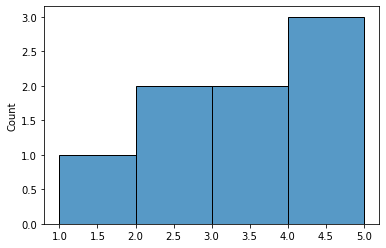

In [44]:
sns.histplot(combine[combine['sr-only']!=-1]['sr-only'].unique())

In [45]:
combine['sr-only'].unique()

array([4.5, 5.0, -1.0, 4.0, 3.5, 3.0, 2.5, 2.0, 1.0], dtype=object)

In [12]:
for i in range(len(combine['sr-only'])):
    value = combine['sr-only'].iloc[i]
    if value >= 1 and value < 2:
        combine['sr-only'].iloc[i] = '1-2'
    elif value >= 2 and value < 3:
        combine['sr-only'].iloc[i] = '2-3'
    elif value >= 3 and value < 4:
        combine['sr-only'].iloc[i] = '3-4'
    elif value >= 4 and value <= 5:
        combine['sr-only'].iloc[i] = '4-5'

In [89]:
for i in range(len(combine_v2['sr-only'])):
    value_v2 = combine_v2['sr-only'].iloc[i]
    if value_v2 >= 1 and value_v2 < 2:
        combine_v2['sr-only'].iloc[i] = '1-2'
    elif value_v2 >= 2 and value_v2 < 3:
        combine_v2['sr-only'].iloc[i] = '2-3'
    elif value_v2 >= 3 and value_v2 < 4:
        combine_v2['sr-only'].iloc[i] = '3-4'
    elif value_v2 >= 4 and value_v2 <= 5:
        combine_v2['sr-only'].iloc[i] = '4-5'

/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_2366/3306465478.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_v2['sr-only'].iloc[i] = '4-5'


Text(0.5, 0, 'unique value of distance')

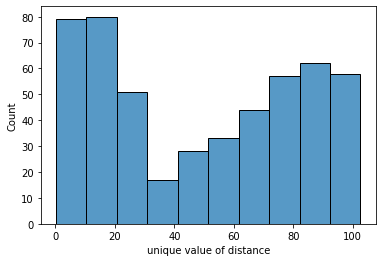

In [20]:
info = sns.histplot(combine['location-info__distance'].unique()).get_figure()
plt.xlabel('unique value of distance')

In [21]:
info.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/info.png', bbox_inches='tight')

In [48]:
combine['location-info__distance'].unique()

array([11.5, 12.8, 0.2, 18.3, 10.4, 13.7, 14.0, 49.3, 9.9, 9.8, 98.7, 9.3,
       81.2, 12.0, 13.8, 101.0, 1.1, 70.7, 11.2, 98.2, 1.3, 1.2, 97.5,
       9.2, 18.1, 14.2, 100.0, 13.2, 20.8, 4.6, 12.7, 13.9, 24.8, 43.9,
       46.7, 48.5, 86.0, 11.1, 100.8, 10.2, 70.9, 56.8, 98.4, 81.6, 97.4,
       100.2, 11.0, 97.6, 10.3, 0.4, 39.6, 99.7, 98.3, 98.5, 102.6, 99.4,
       101.9, 91.5, 67.5, 1.6, 93.7, 94.7, 99.3, 56.4, 99.5, 96.7, 99.1,
       101.1, 49.2, 49.0, 92.6, 1.5, 6.2, 6.9, 9.7, 14.4, 14.9, 47.8,
       49.7, 59.4, 69.5, 69.6, 82.8, 98.6, 99.0, 100.9, 102.4, 20.9, 14.8,
       32.3, 30.9, 31.1, 32.4, 16.7, 28.6, 33.8, 9.5, 27.3, 15.4, 29.0,
       46.5, 54.5, 28.5, 29.3, 54.6, 21.3, 44.3, 7.6, 18.6, 27.8, 46.4,
       18.9, 19.2, 20.0, 21.4, 21.9, 22.2, 27.0, 28.7, 76.6, 27.1, 30.5,
       36.2, 31.4, 25.8, 19.1, 44.8, 21.0, 33.7, 76.4, 21.7, 65.0, 32.5,
       28.9, 30.8, 18.7, 21.5, 24.2, 24.4, 27.4, 31.3, 32.1, 32.2, 87.8,
       94.4, 73.6, 82.7, 56.2, 98.1, 68.6, 74.6, 90.9

In [49]:
for i in range(len(combine['location-info__distance'])):
    value = combine['location-info__distance'].iloc[i]
    if value >= 0 and value < 20:
        combine['location-info__distance'].iloc[i] = '0-20'
    elif value >= 20 and value < 40:
        combine['location-info__distance'].iloc[i] = '20-40'
    elif value >= 40 and value < 60:
        combine['location-info__distance'].iloc[i] = '40-60'
    elif value >= 60 and value <= 80:
        combine['location-info__distance'].iloc[i] = '60-80'
    elif value >= 80 and value <= 100:
        combine['location-info__distance'].iloc[i] = '80-100'
    else:
        combine['location-info__distance'].iloc[i] = '>100'

In [91]:
for i in range(len(combine_v2['location-info__distance'])):
    value_v2 = combine_v2['location-info__distance'].iloc[i]
    if value_v2 >= 0 and value_v2 < 20:
        combine_v2['location-info__distance'].iloc[i] = '0-20'
    elif value_v2 >= 20 and value_v2 < 40:
        combine_v2['location-info__distance'].iloc[i] = '20-30'
    elif value_v2 >= 40 and value_v2 < 60:
        combine_v2['location-info__distance'].iloc[i] = '40-60'
    elif value_v2 >= 60 and value_v2 <= 80:
        combine_v2['location-info__distance'].iloc[i] = '60-80'
    elif value_v2 >= 80 and value_v2 <= 100:
        combine_v2['location-info__distance'].iloc[i] = '80-100'
    else:
        combine_v2['location-info__distance'].iloc[i] = '>100'

/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_2366/3354679085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_v2['location-info__distance'].iloc[i] = '20-30'


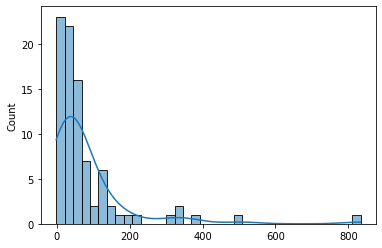

In [11]:
unique = sns.histplot(combine['review_number'].unique(), kde=True).get_figure()

In [12]:
unique.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/unique.png', bbox_inches='tight')

In [51]:
# combine[(combine['review_number'] >= 0) & (combine['review_number'] <= 200)]

Text(0.5, 0, 'review number below 200')

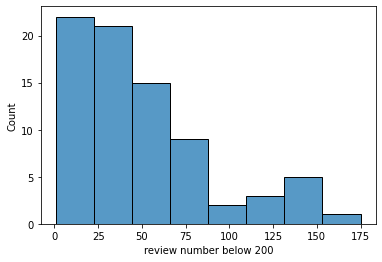

In [24]:
figure4 = sns.histplot(combine[(combine['review_number'] >= 0) & (combine['review_number'] <= 200)]['review_number'].unique()).get_figure()
plt.xlabel('review number below 200')

In [25]:
figure4.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/figure4.png', bbox_inches='tight')

In [53]:
combine['review_number'].unique()

array([51, 303, 69, 39, 25, 175, 40, 57, 833, 48, 41, 341, 33, 67, 9, 27,
       11, 202, -1, 16, 38, 17, 29, 65, 15, 5, 14, 26, 3, 72, 12, 4, 1, 2,
       7, 8, 13, 32, 10, 24, 18, 20, 6, 28, 42, 36, 22, 23, 19, 37, 151,
       62, 220, 47, 53, 45, 134, 132, 332, 75, 71, 68, 372, 35, 56, 46,
       43, 102, 120, 44, 108, 63, 83, 507, 118, 55, 31, 73, 52, 21, 80,
       146, 49, 34, 66, 136, 122], dtype=object)

In [54]:
for i in range(len(combine['review_number'])):
    value = combine['review_number'].iloc[i]
    if value >= 0 and value < 25:
        combine['review_number'].iloc[i] = '0-25'
    elif value >= 25 and value < 50:
        combine['review_number'].iloc[i] = '25-50'
    elif value >= 50 and value < 75:
        combine['review_number'].iloc[i] = '50-75'
    elif value >= 75 and value < 100:
        combine['review_number'].iloc[i] = '75-100'
    elif value >= 100 and value < 125:
        combine['review_number'].iloc[i] = '100-125'
    elif value >= 125 and value < 150:
        combine['review_number'].iloc[i] = '125-150'
    elif value >= 150 and value < 175:
        combine['review_number'].iloc[i] = '150-175'
    elif value >= 175 and value < 400:
        combine['review_number'].iloc[i] = '175-400'
    else:
        combine['review_number'].iloc[i] = '>400'

In [93]:
for i in range(len(combine_v2['review_number'])):
    value_v2 = combine_v2['review_number'].iloc[i]
    if value_v2 >= 0 and value_v2 < 25:
        combine_v2['review_number'].iloc[i] = '0-25'
    elif value_v2 >= 25 and value_v2 < 50:
        combine_v2['review_number'].iloc[i] = '25-50'
    elif value_v2 >= 50 and value_v2 < 75:
        combine_v2['review_number'].iloc[i] = '50-75'
    elif value_v2 >= 75 and value_v2 < 100:
        combine_v2['review_number'].iloc[i] = '75-100'
    elif value_v2 >= 100 and value_v2 < 125:
        combine_v2['review_number'].iloc[i] = '100-125'
    elif value_v2 >= 125 and value_v2 < 150:
        combine_v2['review_number'].iloc[i] = '125-150'
    elif value_v2 >= 150 and value_v2 < 175:
        combine_v2['review_number'].iloc[i] = '150-175'
    elif value_v2 >= 175 and value_v2 < 400:
        combine_v2['review_number'].iloc[i] = '175-400'
    else:
        combine_v2['review_number'].iloc[i] = '>400'

/var/folders/20/h9hzw4qs64321s82n6w8zjyr0000gn/T/ipykernel_2366/3932406249.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_v2['review_number'].iloc[i] = '>400'


In [94]:
combine_v2

,provider-name__lnk,location-info__office-loc 2,sr-only,location-info__distance,review_number,provider_detail,feats,feats1,feats2
0,"Abbey Bays, MPAS",0,-1.0,20-30,>400,17.0,0.0,0.0,1.0
1,"Amy Julian-Resner, FNP",1,-1.0,40-60,>400,29.0,0.0,0.0,1.0
2,"Brenna Hennessey, PA-C",2,-1.0,40-60,>400,17.0,0.0,0.0,1.0
3,"Bryn Byers, NP",2,4-5,60-80,0-25,26.0,3.0,4.0,0.0
4,"Crystal Wesockes, PA-C",2,4-5,40-60,0-25,17.0,5.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
816,"Layla Shadman, MSPA",2,-1.0,40-60,>400,17.0,0.0,0.0,1.0
817,"Megan Perinovic, PA-C",3,-1.0,20-30,>400,17.0,0.0,0.0,1.0
818,"Rachel Hunt, PA-C",0,-1.0,20-30,>400,17.0,0.0,0.0,1.0
819,"Rachita Sood, MPH",2,-1.0,40-60,>400,17.0,0.0,0.0,1.0


In [56]:
combine.to_csv('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/combine.csv')

In [95]:
combine_v2.to_csv('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/combine_v2_final.csv')

# data explore - part 2

In [88]:
combined = pd.read_csv('/Users/jennyhuang/Documents/jobs/DBC-AI Launch/project2-MDdataCleaning/data-explore/combine.csv')